In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("data_banknote_authentication.csv")

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### 1

In [5]:
df["color"]=df["class"].apply(lambda x:'green' if x==0 else 'red')

In [10]:
df

,variance,skewness,curtosis,entropy,class,color
0,3.62160,8.66610,-2.8073,-0.44699,0,green
1,4.54590,8.16740,-2.4586,-1.46210,0,green
2,3.86600,-2.63830,1.9242,0.10645,0,green
3,3.45660,9.52280,-4.0112,-3.59440,0,green
4,0.32924,-4.45520,4.5718,-0.98880,0,green
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,red
1368,-1.38870,-4.87730,6.4774,0.34179,1,red
1369,-3.75030,-13.45860,17.5932,-2.77710,1,red
1370,-3.56370,-8.38270,12.3930,-1.28230,1,red


## 2

In [13]:
import pandas as pd

# Assuming the DataFrame is already loaded with the correct column names
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class', 'color']

# Exclude the 'color' column before aggregation
numeric_df = df.drop(columns=['color'])

# Calculate mean and standard deviation for each feature grouped by class
stats_by_class = numeric_df.groupby('class').agg(['mean', 'std']).round(2)

# Calculate overall mean and std for all rows
overall_stats = numeric_df.agg(['mean', 'std']).round(2)

# Reformat the DataFrame to match the given table structure
formatted_table = pd.DataFrame({
    'class': ['0', '1', 'all'],
    'μ(f1)': [stats_by_class.loc[0, ('variance', 'mean')], stats_by_class.loc[1, ('variance', 'mean')], overall_stats.loc['mean', 'variance']],
    'σ(f1)': [stats_by_class.loc[0, ('variance', 'std')], stats_by_class.loc[1, ('variance', 'std')], overall_stats.loc['std', 'variance']],
    'μ(f2)': [stats_by_class.loc[0, ('skewness', 'mean')], stats_by_class.loc[1, ('skewness', 'mean')], overall_stats.loc['mean', 'skewness']],
    'σ(f2)': [stats_by_class.loc[0, ('skewness', 'std')], stats_by_class.loc[1, ('skewness', 'std')], overall_stats.loc['std', 'skewness']],
    'μ(f3)': [stats_by_class.loc[0, ('curtosis', 'mean')], stats_by_class.loc[1, ('curtosis', 'mean')], overall_stats.loc['mean', 'curtosis']],
    'σ(f3)': [stats_by_class.loc[0, ('curtosis', 'std')], stats_by_class.loc[1, ('curtosis', 'std')], overall_stats.loc['std', 'curtosis']],
    'μ(f4)': [stats_by_class.loc[0, ('entropy', 'mean')], stats_by_class.loc[1, ('entropy', 'mean')], overall_stats.loc['mean', 'entropy']],
    'σ(f4)': [stats_by_class.loc[0, ('entropy', 'std')], stats_by_class.loc[1, ('entropy', 'std')], overall_stats.loc['std', 'entropy']],
})

# Display the formatted table
print(formatted_table.to_string(index=False))

class  μ(f1)  σ(f1)  μ(f2)  σ(f2)  μ(f3)  σ(f3)  μ(f4)  σ(f4)
    0   2.28   2.02   4.26   5.14   0.80   3.24  -1.15   2.13
    1  -1.87   1.88  -0.99   5.40   2.15   5.26  -1.25   2.07
  all   0.43   2.84   1.92   5.87   1.40   4.31  -1.19   2.10


## 3

**Variance (f1):**

The mean (μ(f1)) for class 0 (real banknotes) is positive (2.28), while for class 1 (fake banknotes) it is negative (-1.87). This indicates that real banknotes tend to have a higher variance in the wavelet transformed image compared to fake banknotes.

The standard deviation (σ(f1)) is similar for both classes, indicating that the spread of variance values is not significantly different between real and fake banknotes.

**Skewness (f2):**

The mean skewness (μ(f2)) for class 0 is 4.26, much higher than that for class 1, which is -0.99. This suggests that real banknotes tend to exhibit more positive skewness compared to fake banknotes.

The standard deviation (σ(f2)) is quite close for both classes, implying that the spread of skewness values is also not drastically different.

**Curtosis (f3):**

The mean curtosis (μ(f3)) for class 0 is 0.80, while for class 1 it is significantly higher at 2.15. This indicates that fake banknotes may exhibit higher peakedness in the distribution of wavelet transformed image values.

The standard deviation (σ(f3)) is higher for class 1, suggesting more variability in curtosis among fake banknotes.

**Entropy (f4):**

Both classes have negative mean entropy values (μ(f4)), but class 1 has a slightly lower mean (-1.25) compared to class 0 (-1.15). This suggests that the entropy values for fake banknotes may be slightly more negative, indicating potentially more disorder in the image representation.

The standard deviation (σ(f4)) is close for both classes, indicating similar variability in entropy values.

**Overall Patterns:**

Real banknotes generally have higher variance and skewness values, while fake banknotes exhibit higher curtosis.

The differences in mean values across features suggest that variance, skewness, and curtosis might play significant roles in distinguishing between real and fake banknotes.

### 1

In [19]:
# Split the dataset into 50% training and 50% testing
X_train, X_test = train_test_split(df, test_size=0.5, random_state=42, stratify=df['class'])

# Define custom color palettes
good_palette = {'green': 'green'}
fake_palette = {'red': 'red'}

# Plot pairwise relationships for class 0 (good bills) with green color
good_bills = X_train[X_train['class'] == 0]
sns.pairplot(good_bills, hue='color', diag_kind='hist', palette=good_palette)
plt.suptitle('Pairwise Relationships for Good Bills', y=1.02)
plt.savefig('good_bills.pdf')
plt.close()

# Plot pairwise relationships for class 1 (fake bills) with red color
fake_bills = X_train[X_train['class'] == 1]
sns.pairplot(fake_bills, hue='color', diag_kind='hist', palette=fake_palette)
plt.suptitle('Pairwise Relationships for Fake Bills', y=1.02)
plt.savefig('fake_bills.pdf')
plt.close()

print("Pairwise plots have been saved as 'good_bills.pdf' and 'fake_bills.pdf'.")


Pairwise plots have been saved as 'good_bills.pdf' and 'fake_bills.pdf'.


### 2

In [41]:
def simple_classifier(f1, f2, f3, f4):
    # Rule-based classifier
    if (f1 > 0) and (f2 > 2) and (f3 < 3) and (f4 < 0):
        x = 0 
    else:
        x = 1 
    return x

### 3

In [43]:
# Apply the simple classifier to the test data
X_test['predicted_class'] = X_test.apply(lambda row: simple_classifier(row['variance'], row['skewness'], row['curtosis'], row['entropy']), axis=1)

### 4

In [45]:
# True labels and predicted labels
y_true = X_test['class']
y_pred = X_test['predicted_class']

# Calculate TP, FP, TN, FN
TP = ((y_pred == 1) & (y_true == 1)).sum()
FP = ((y_pred == 1) & (y_true == 0)).sum()
TN = ((y_pred == 0) & (y_true == 0)).sum()
FN = ((y_pred == 0) & (y_true == 1)).sum()

# Calculate TPR and TNR
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0  # True Negative Rate (Specificity)

# Print the results
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print(f"TPR (Recall): {TPR:.2f}")
print(f"TNR (Specificity): {TNR:.2f}")


TP: 278, FP: 230, TN: 151, FN: 27
TPR (Recall): 0.91
TNR (Specificity): 0.40


### 5

In [48]:
# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) != 0 else 0

# Create a DataFrame to summarize the results
results_summary = pd.DataFrame({
    'TP': [TP],
    'FP': [FP],
    'TN': [TN],
    'FN': [FN],
    'accuracy': [round(accuracy, 2)],
    'TPR': [round(TPR, 2)],
    'TNR': [round(TNR, 2)]
})

# Display the results
print(results_summary.to_string(index=False))


 TP  FP  TN  FN  accuracy  TPR  TNR
278 230 151  27      0.63 0.91  0.4


### 6

The simple classifier achieves an overall accuracy of 0.63, which is better than 50% (random guessing). This indicates that the classifier is able to identify bills with an accuracy above random chance.

However, when examining the True Positive Rate (TPR) and True Negative Rate (TNR), we see that the TPR is much higher (0.91) compared to the TNR (0.40). This suggests that the classifier performs better at identifying "fake" bills (class 1) than "real" bills (class 0). In other words, it has a higher accuracy in detecting fake bills, but it struggles with correctly identifying real bills.

k = 3: TP = 300, FP = 0, TN = 386, FN = 0, accuracy = 1.00, TPR = 1.00, TNR = 1.00
k = 5: TP = 300, FP = 0, TN = 386, FN = 0, accuracy = 1.00, TPR = 1.00, TNR = 1.00
k = 7: TP = 300, FP = 0, TN = 386, FN = 0, accuracy = 1.00, TPR = 1.00, TNR = 1.00
k = 9: TP = 300, FP = 3, TN = 383, FN = 0, accuracy = 1.00, TPR = 1.00, TNR = 0.99
k = 11: TP = 300, FP = 6, TN = 380, FN = 0, accuracy = 0.99, TPR = 1.00, TNR = 0.98


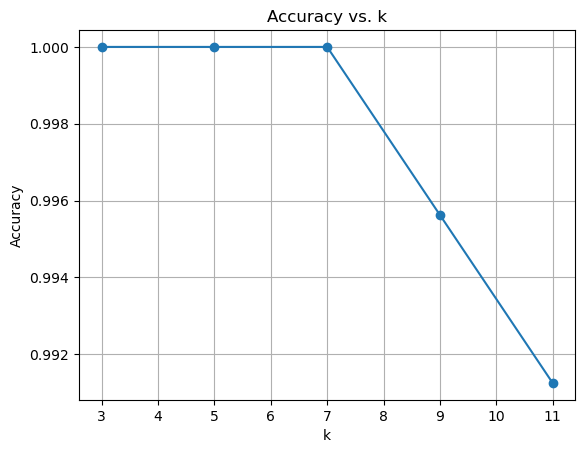

The optimal value of k* is 3


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Split the dataset into features and target variable
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']

# List to store accuracies for different k values
accuracies = []

# Iterate over different k values
for k in [3, 5, 7, 9, 11]:
    # Split into 50/50 training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    
    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate confusion matrix values
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate TPR and TNR
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    # Print results for current k
    print(f"k = {k}: TP = {TP}, FP = {FP}, TN = {TN}, FN = {FN}, accuracy = {accuracy:.2f}, TPR = {TPR:.2f}, TNR = {TNR:.2f}")

# Plot accuracy vs. k
plt.plot([3, 5, 7, 9, 11], accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Find optimal k (k*)
k_star = [3, 5, 7, 9, 11][accuracies.index(max(accuracies))]
print(f"The optimal value of k* is {k_star}")


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Train k-NN classifier with the optimal k* value
k_optimal = 3
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred_knn = knn.predict(X_test)

# Calculate TP, FP, TN, FN using confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate TPR and TNR
tpr_knn = tp / (tp + fn) if (tp + fn) != 0 else 0
tnr_knn = tn / (tn + fp) if (tn + fp) != 0 else 0

# Summarize the findings in a table
summary_table = pd.DataFrame({
    'TP': [tp],
    'FP': [fp],
    'TN': [tn],
    'FN': [fn],
    'accuracy': [round(accuracy_knn, 2)],
    'TPR': [round(tpr_knn, 2)],
    'TNR': [round(tnr_knn, 2)]
})

# Display the table
print(summary_table.to_string(index=False))


 TP  FP  TN  FN  accuracy  TPR  TNR
300   0 386   0       1.0  1.0  1.0


Yes, the k-NN classifier performs significantly better than the simple classifier in all measures:

Accuracy: The k-NN classifier achieves an accuracy of 1.00 (100%) for k=3,5,7, whereas the simple classifier's accuracy was only 0.63 (63%).

TPR (Recall): 1.00 (100%) for all values of k, since all positive cases are correctly identified.

TNR (Specificity): Close to 1.00 (100%) for values of 𝑘=3,5,7, indicating that almost all negative cases are also correctly identified.

In [67]:
simple_class_label = simple_classifier(6, 7, 8, 2)
print(f"Simple Classifier Prediction: {simple_class_label}")


Simple Classifier Prediction: fake


In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create a DataFrame for the new data point with the correct feature names
new_data = pd.DataFrame([[6, 7, 8, 2]], columns=['variance', 'skewness', 'curtosis', 'entropy'])

# Predict the class label
knn_class_label = knn.predict(new_data)
print(f"k-NN Classifier Prediction: {'good' if knn_class_label[0] == 0 else 'fake'}")

k-NN Classifier Prediction: good


In [79]:
from sklearn.model_selection import train_test_split

# Function to train and evaluate k-NN accuracy with a given feature set
def evaluate_knn_accuracy(features_to_drop, k_optimal):
    # Drop the specified features from X_train and X_test
    X_train_truncated = X_train.drop(columns=features_to_drop)
    X_test_truncated = X_test.drop(columns=features_to_drop)
    
    # Train the k-NN classifier on the truncated feature set
    knn = KNeighborsClassifier(n_neighbors=k_optimal)
    knn.fit(X_train_truncated, y_train)
    
    # Predict the labels for the truncated test set
    y_pred_truncated = knn.predict(X_test_truncated)
    
    # Calculate accuracy
    accuracy_truncated = accuracy_score(y_test, y_pred_truncated)
    return round(accuracy_truncated, 2)

# List of feature sets to drop one at a time
features = ['variance', 'skewness', 'curtosis', 'entropy']
accuracies = {}

# Evaluate k-NN accuracy by dropping each feature one by one
for feature in features:
    accuracy = evaluate_knn_accuracy([feature], k_optimal)
    accuracies[feature] = accuracy
    print(f"Accuracy with {feature} dropped: {accuracy}")

# Accuracy with all features
accuracy_all_features = evaluate_knn_accuracy([], k_optimal)
print(f"Accuracy with all features: {accuracy_all_features}")

Accuracy with variance dropped: 0.96
Accuracy with skewness dropped: 0.98
Accuracy with curtosis dropped: 0.98
Accuracy with entropy dropped: 0.99
Accuracy with all features: 1.0


In [83]:
# Analysis
accuracy_increase = any(accuracy > accuracy_all_features for accuracy in accuracies.values())
most_impact = min(accuracies, key=accuracies.get)
least_impact = max(accuracies, key=accuracies.get)

print("\nDid accuracy increase when a feature was removed?:", accuracy_increase)


Did accuracy increase when a feature was removed?: False


In [92]:
print("Feature contributing the most to loss of accuracy when removed:", most_impact)

Feature contributing the most to loss of accuracy when removed: variance


In [96]:
print("Feature contributing the least to loss of accuracy when removed:", least_impact)

Feature contributing the least to loss of accuracy when removed: entropy


In [116]:
from sklearn.linear_model import LogisticRegression

# Assuming the dataset is already loaded into a DataFrame named df with features and target
# Separate features and target
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']

# Step 1: Train logistic regression model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the logistic regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred_log_reg = log_reg.predict(X_test)

# Step 2: Calculate performance metrics
# Confusion matrix components
TP = ((y_pred_log_reg == 1) & (y_test == 1)).sum()
FP = ((y_pred_log_reg == 1) & (y_test == 0)).sum()
TN = ((y_pred_log_reg == 0) & (y_test == 0)).sum()
FN = ((y_pred_log_reg == 0) & (y_test == 1)).sum()

# Accuracy, TPR (Recall), and TNR (Specificity)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
TPR_log_reg = TP / (TP + FN) if (TP + FN) != 0 else 0
TNR_log_reg = TN / (TN + FP) if (TN + FP) != 0 else 0

# Step 3: Create the DataFrame to display results
results_df = pd.DataFrame({
    'TP': [TP],
    'FP': [FP],
    'TN': [TN],
    'FN': [FN],
    'accuracy': [round(accuracy_log_reg, 2)],
    'TPR': [round(TPR_log_reg, 2)],
    'TNR': [round(TNR_log_reg, 2)]
})

# Display the DataFrame in the desired format
print(results_df.to_string(index=False))



 TP  FP  TN  FN  accuracy  TPR  TNR
298   4 382   2      0.99 0.99 0.99


The logistic regression classifier is significantly better than the simple classifier in all metrics (TP, FP, TN, FN, accuracy, TPR, and TNR). The logistic regression model achieves a higher accuracy and performs better at distinguishing both true positives and true negatives.

The k-NN classifier with 𝑘=3 performs slightly better than logistic regression. It achieves perfect accuracy (1.00) with no false positives or false negatives, while logistic regression has slightly lower metrics due to a few false positives (FP = 4) and false negatives (FN = 2).

In [118]:
# Predict for a bill containing the last 4 digits of your BUID (6782)
bill_features = pd.DataFrame([[6, 7, 8, 2]], columns=['variance', 'skewness', 'curtosis', 'entropy'])  # Use a DataFrame with feature names
predicted_label_log_reg = log_reg.predict(bill_features)[0]

# Output the result
print(f"The class label predicted by logistic regression for the bill with features [6, 7, 8, 2] is: {predicted_label_log_reg}")

The class label predicted by logistic regression for the bill with features [6, 7, 8, 2] is: 0


In [127]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming the dataset is already loaded into a DataFrame named df with features and target
# Separate features and target
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']

# Function to compute accuracy after removing one feature
def evaluate_feature_removal(feature_to_remove):
    if feature_to_remove:  # If a feature is specified to be removed
        # Drop the specified feature
        X_reduced = X.drop(columns=[feature_to_remove])
    else:
        # Use all features if no feature is specified to be removed
        X_reduced = X
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.5, random_state=42)
    
    # Train the logistic regression classifier
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    
    # Predict the class labels for the test set
    y_pred = log_reg.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate accuracy for all scenarios
accuracy_all_features = evaluate_feature_removal(feature_to_remove=None) # Evaluate with all features
accuracy_f1_missing = evaluate_feature_removal('variance')
accuracy_f2_missing = evaluate_feature_removal('skewness')
accuracy_f3_missing = evaluate_feature_removal('curtosis')
accuracy_f4_missing = evaluate_feature_removal('entropy')

# Display the results
print(f"Accuracy with all features: {accuracy_all_features:.2f}")
print(f"Accuracy without f1 (variance): {accuracy_f1_missing:.2f}")
print(f"Accuracy without f2 (skewness): {accuracy_f2_missing:.2f}")
print(f"Accuracy without f3 (curtosis): {accuracy_f3_missing:.2f}")
print(f"Accuracy without f4 (entropy): {accuracy_f4_missing:.2f}")

Accuracy with all features: 0.99
Accuracy without f1 (variance): 0.81
Accuracy without f2 (skewness): 0.91
Accuracy without f3 (curtosis): 0.87
Accuracy without f4 (entropy): 0.99


No, the accuracy did not increase in any of the 4 cases when a feature was removed compared to when all 4 features were used. The highest accuracy achieved without any feature was still 0.99, which matched the accuracy with all features present. In cases where features were removed (especially f1, f2, and f3), the accuracy decreased.

In [131]:
# Determine the feature that contributed the most and least to accuracy loss
accuracy_drop = {
    'f1 (variance)': accuracy_all_features - accuracy_f1_missing,
    'f2 (skewness)': accuracy_all_features - accuracy_f2_missing,
    'f3 (curtosis)': accuracy_all_features - accuracy_f3_missing,
    'f4 (entropy)': accuracy_all_features - accuracy_f4_missing
}

most_impactful_feature = max(accuracy_drop, key=accuracy_drop.get)
least_impactful_feature = min(accuracy_drop, key=accuracy_drop.get)

print(f"Feature whose removal caused the most accuracy drop: {most_impactful_feature}")
print(f"Feature whose removal caused the least accuracy drop: {least_impactful_feature}")

Feature whose removal caused the most accuracy drop: f1 (variance)
Feature whose removal caused the least accuracy drop: f4 (entropy)


The relative significance of features obtained from logistic regression aligns with the findings from the k-NN classifier. Both approaches suggest that variance is the most important feature, while entropy is the least important.